In [8]:
%run load-db.ipynb

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'i

In [9]:
X_ohe = pd.get_dummies(X_sample, drop_first=True)

# PCA, MCA

## Scale

In [10]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_sample[numerical_cols])

## MCA

In [11]:
mca = prince.MCA(n_components=10, random_state=28)
X_cat_mca = mca.fit_transform(X_ohe)

## PCA

In [12]:
pca = PCA(n_components=0.95, random_state=95)
X_num_pca = pca.fit_transform(X_num_scaled)

# TSNE on PCA and MCA

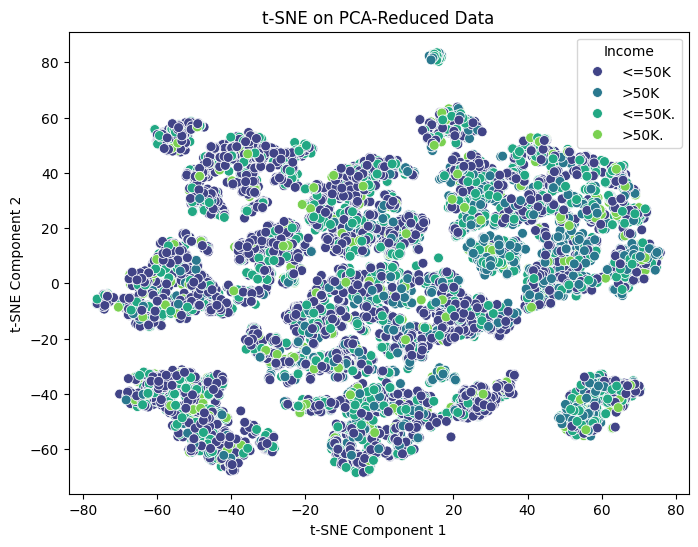

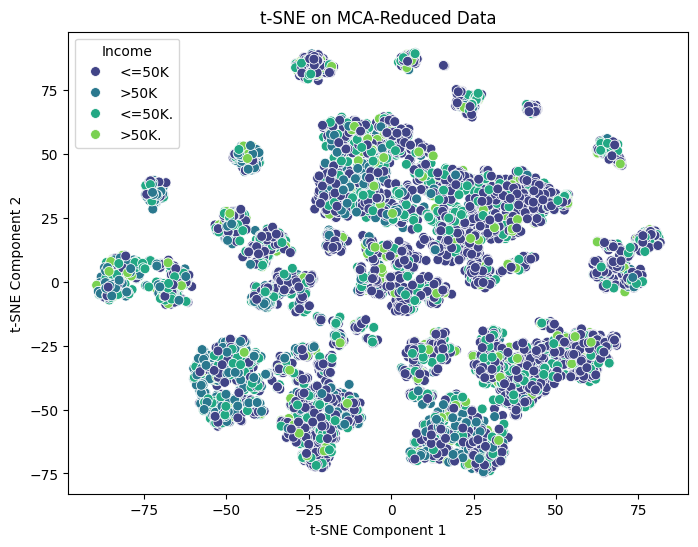

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne_pca = TSNE(n_components=2, random_state=53, perplexity=50)
X_tsne_pca = tsne_pca.fit_transform(X_num_pca)

tsne_mca = TSNE(n_components=2, random_state=14, perplexity=40)
X_tsne_mca = tsne_mca.fit_transform(X_cat_mca)

def plot_tsne(X_tsne, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_sample, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Income')
    plt.show()

# Visualizations
plot_tsne(X_tsne_pca, 't-SNE on PCA-Reduced Data')
plot_tsne(X_tsne_mca, 't-SNE on MCA-Reduced Data')


# Combining

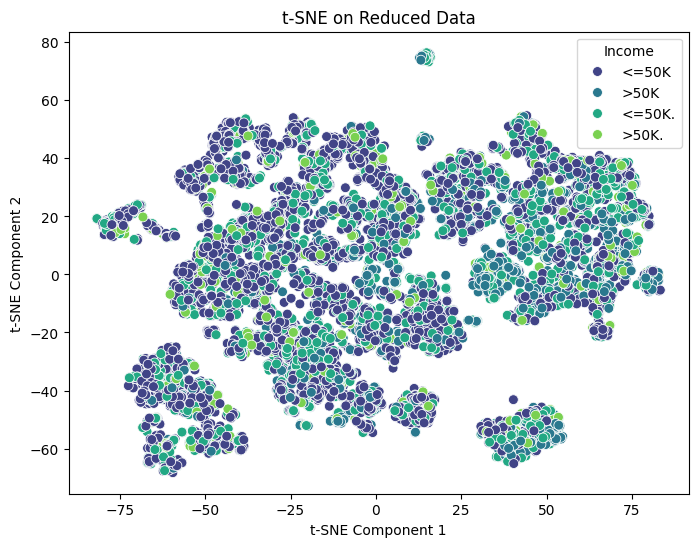

In [14]:
X_combined = np.hstack((X_num_pca, X_cat_mca))
tsne = TSNE(n_components=2, random_state=36, perplexity=50)
X_tsne = tsne.fit_transform(X_combined)
plot_tsne(X_tsne, 't-SNE on Reduced Data')